In [ ]:
!pip install tqdm

In [ ]:
import numpy as np
from numpy import pi
import random
from tqdm.notebook import tqdm

In [ ]:
def beamsplitter(alpha):

  r = random.uniform(0, 1)

  if r > (np.cos(alpha)**2) : return -1
  else : return 1

In [ ]:
def output(W,N,theta_1,theta_2):

  T_0 = 1000
  result_1 = np.zeros(( len(theta_1), N ))
  result_2 = np.zeros(( len(theta_1), N ))
  time_tag = np.full(( len(theta_1), N ), False)

  for i, theta in tqdm(enumerate(theta_1)):

    for j in tqdm(range(N)):

      xi = random.uniform(0, 2*pi)
      alpha_1 = xi + theta
      alpha_2 = xi + pi/2 + theta_2

      result_1[i][j] = beamsplitter(alpha_1)
      result_2[i][j] = beamsplitter(alpha_2)

      tag_1 = T_0 * random.uniform(0, 1) * (np.sin(2*alpha_1)**4)
      tag_2 = T_0 * random.uniform(0, 1) * (np.sin(2*alpha_2)**4)

      if abs(tag_1-tag_2) < W: time_tag[i][j] = True

  return result_1, result_2, time_tag

In [ ]:
def count_12(r1, r2):

  if r1 == 1 and r2 == 1: return 1
  elif r1 == -1 and r2 == -1: return 1
  elif r1 == 1 and r2 == -1: return -1
  else: return -1

def statistic(result_1, result_2, time_tag, coincidence):

  N = result_1.shape[1]
  len_theta = result_1.shape[0]

  E_1 = np.zeros(len_theta)
  E_2 = np.zeros(len_theta)
  E_12 = np.zeros(len_theta)

  if coincidence:

    for i in range(len_theta):

      tag_count = 0

      for j in range(N):

        if time_tag[i][j]:

          tag_count += 1
          E_12[i] += count_12( result_1[i][j], result_2[i][j] )
          E_1[i] += result_1[i][j]
          E_2[i] += result_2[i][j]

      E_12[i] /= tag_count
      E_1[i] /= tag_count
      E_2[i] /= tag_count

  else:

    for i in range(len_theta):

      for j in range(N):

          E_12[i] += count_12( result_1[i][j], result_2[i][j] )

      E_12[i] /= N

      E_1 = np.sum(result_1,axis=1) / N
      E_2 = np.sum(result_2,axis=1) / N

  return E_1, E_2, E_12

In [ ]:
theta_1 = np.linspace(0,2*pi,62)
theta_2 = 0
N = 300000 # number of events for each theta

#output(W,N,theta_1,theta_2)
result_1, result_2, time_tag = output(2,N,theta_1,theta_2)

In [ ]:
#statistic(result_1, result_2, time_tag, coincidence)
E_1, E_2, E_12 = statistic(result_1, result_2, time_tag, False)
CE_1, CE_2, CE_12 = statistic(result_1, result_2, time_tag, True)

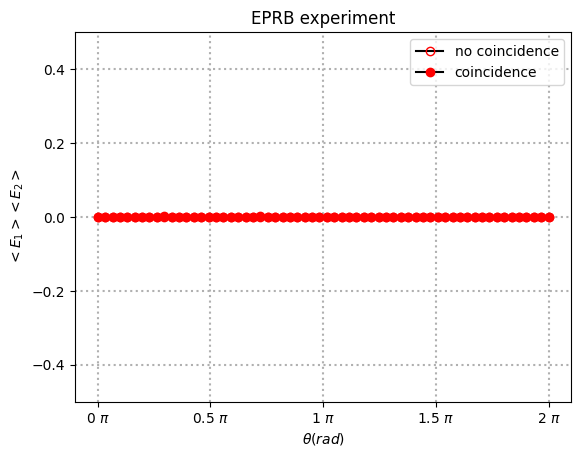

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

plt.plot(theta_1/pi,E_1*E_2,label="no coincidence",color = "black", markerfacecolor = "red", markeredgecolor = "red", marker = "o", fillstyle = "none")
# plt.plot(theta_1/pi,E_12,label="no coincidence",color = "black", markerfacecolor = "red", markeredgecolor = "red", marker = "o", fillstyle = "none")

plt.plot(theta_1/pi,CE_1*CE_2,label="coincidence",color = "black", markerfacecolor = "red", markeredgecolor = "red", marker = "o")
# plt.plot(theta_1/pi,CE_12,label="coincidence",color = "black", markerfacecolor = "red", markeredgecolor = "red", marker = "o")

ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tick.MultipleLocator(base=0.5))

plt.ylim(-0.5,0.5)
plt.title("EPRB experiment")
plt.xlabel(r"$\theta(rad)$")
plt.ylabel("$<E_1><E_2>$")
plt.grid(linestyle = "dotted", linewidth = 1.5)
plt.legend()
plt.show()